# Introducción Regresion Lineal

La regresión lineal es un método estadístico útil que podemos utilizar para comprender la relación entre dos variables, x e y. Sin embargo, antes de realizar una regresión lineal, primero debemos asegurarnos de que se cumplan cuatro supuestos:

1. **Relación lineal**: existe una relación lineal entre la variable independiente, x, y la variable dependiente, y.

2. **Independencia**: Los residuos son independientes. En particular, no existe correlación entre residuos consecutivos en datos de series de tiempo.

3. **Homoscedasticidad**: Los residuos tienen varianza constante en cada nivel de x.

4. **Normalidad**: Los residuos del modelo se distribuyen normalmente.


Si se violan uno o más de estos supuestos, los resultados de nuestra regresión lineal pueden ser poco fiables o incluso engañosos.


##1. Relación lineal

La forma más fácil de detectar si se cumple esta suposición es crear un diagrama de dispersión de x vs. y. Esto le permite ver visualmente si existe una relación lineal entre las dos variables.

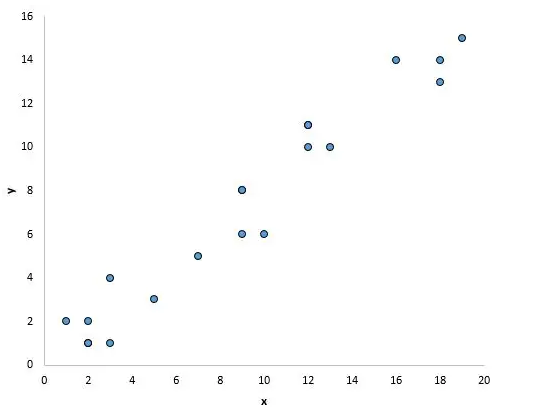 SI
---------------------------------------------------------------------------

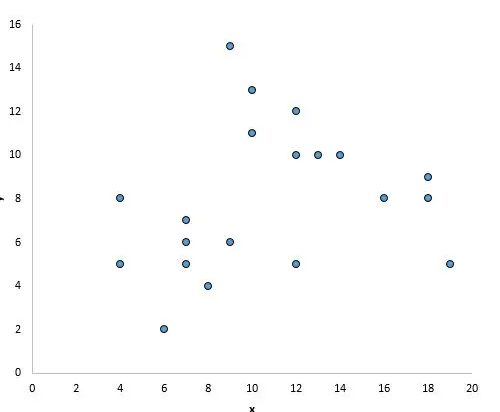
NO

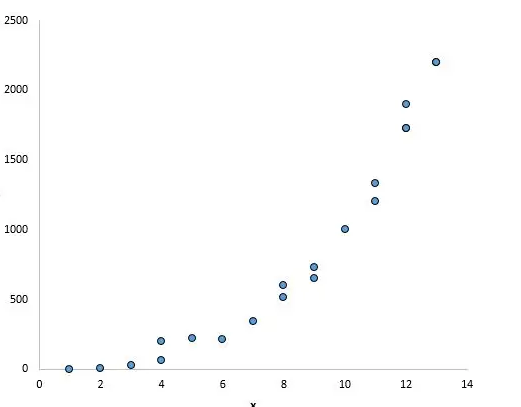
NO


##2. Independencia
El siguiente supuesto de la regresión lineal es que los residuos son independientes. Esto es más relevante cuando se trabaja con datos de series de tiempo. Idealmente, no queremos que haya un patrón entre residuos consecutivos. Por ejemplo, los residuos no deberían crecer constantemente a medida que pasa el tiempo.
Se puede probar formalmente si se cumple esta suposición mediante la prueba de [Durbin-Watson ](https://statologos.com/test-de-durbin-watson-en-python/).

##3. Homoscedasticidad
El siguiente supuesto de la regresión lineal es que los residuos tienen varianza constante en cada nivel de x. Esto se conoce como homocedasticidad . Cuando este no es el caso, se dice que los residuos sufren de heterocedasticidad .

La forma más sencilla de detectar heterocedasticidad es creando un valor ajustado frente a una gráfica residual (la grafica residual es la grafica con los valores predecidos y los valores que teniamos. A la diferencia entre un valor y el valor predecido se llama residuo, se vera mas adelante en el método de los minimos cuadrados) .

Una vez que ajusta una línea de regresión a un conjunto de datos, puede crear un diagrama de dispersión que muestre los valores ajustados del modelo frente a los residuos de esos valores ajustados. La gráfica de dispersión a continuación muestra un valor ajustado típico frente a una gráfica residual en la que está presente la heterocedasticidad.

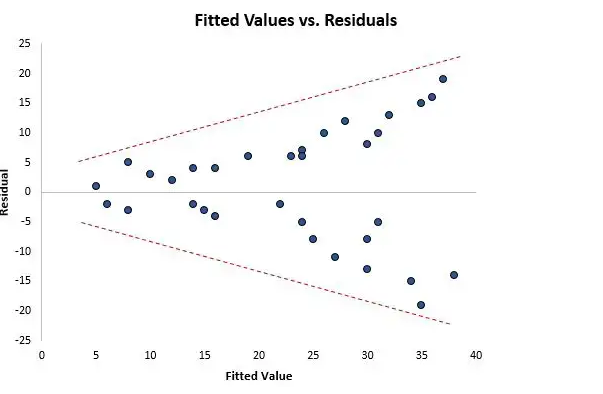

Como vemos los valores residuales se dispersan mucho más a medida que los valores ajustados aumentan. Esta forma de «cono» es un signo clásico de heterocedasticidad

## 4.Normalidad

Para comprobar si se cumple este supuesto verificamos la suposición visualmente usando gráficos QQ .

Un gráfico QQ, abreviatura de gráfico de cuantiles-cuantiles, es un tipo de gráfico que podemos utilizar para determinar si los residuos de un modelo siguen una distribución normal. Si los puntos del gráfico forman aproximadamente una línea diagonal recta, se cumple el supuesto de normalidad.

La siguiente gráfica QQ muestra un ejemplo de residuos que siguen aproximadamente una distribución normal:

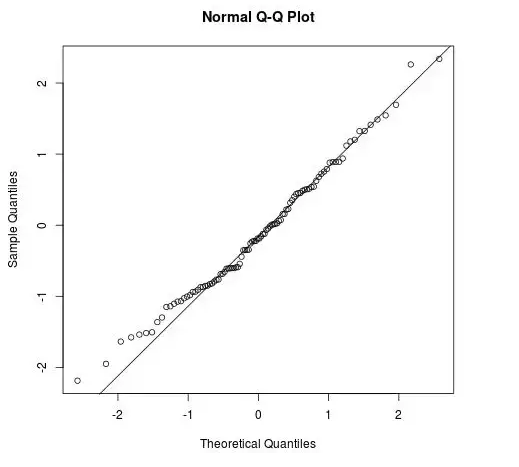

Sin embargo, la gráfica QQ a continuación muestra un ejemplo de cuando los residuos se apartan claramente de una línea diagonal recta, lo que indica que no siguen la distribución normal:

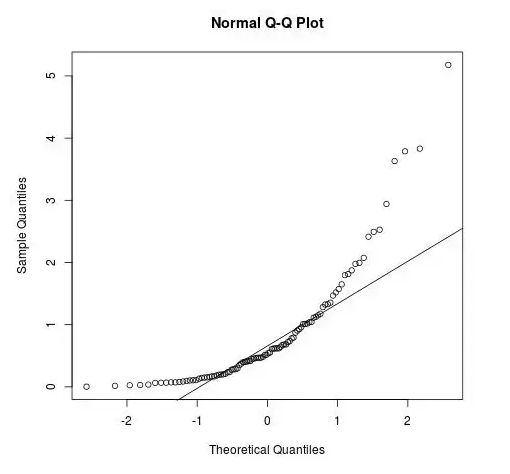


# Regresión Lineal Simple

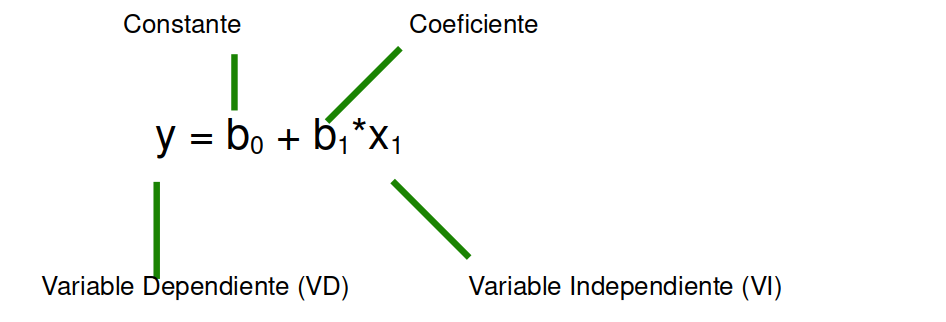

La regresión lineal simple solo tiene 1 variable independiente, x1 en este caso.
Donde b1 es el coeficiente de crecimiento (la pendiente de la recta)  y b0 es el valor inicial de la recta cuando la variable dependiente vale 0.

Veamos el ejemplo con años de experiencia - salario 

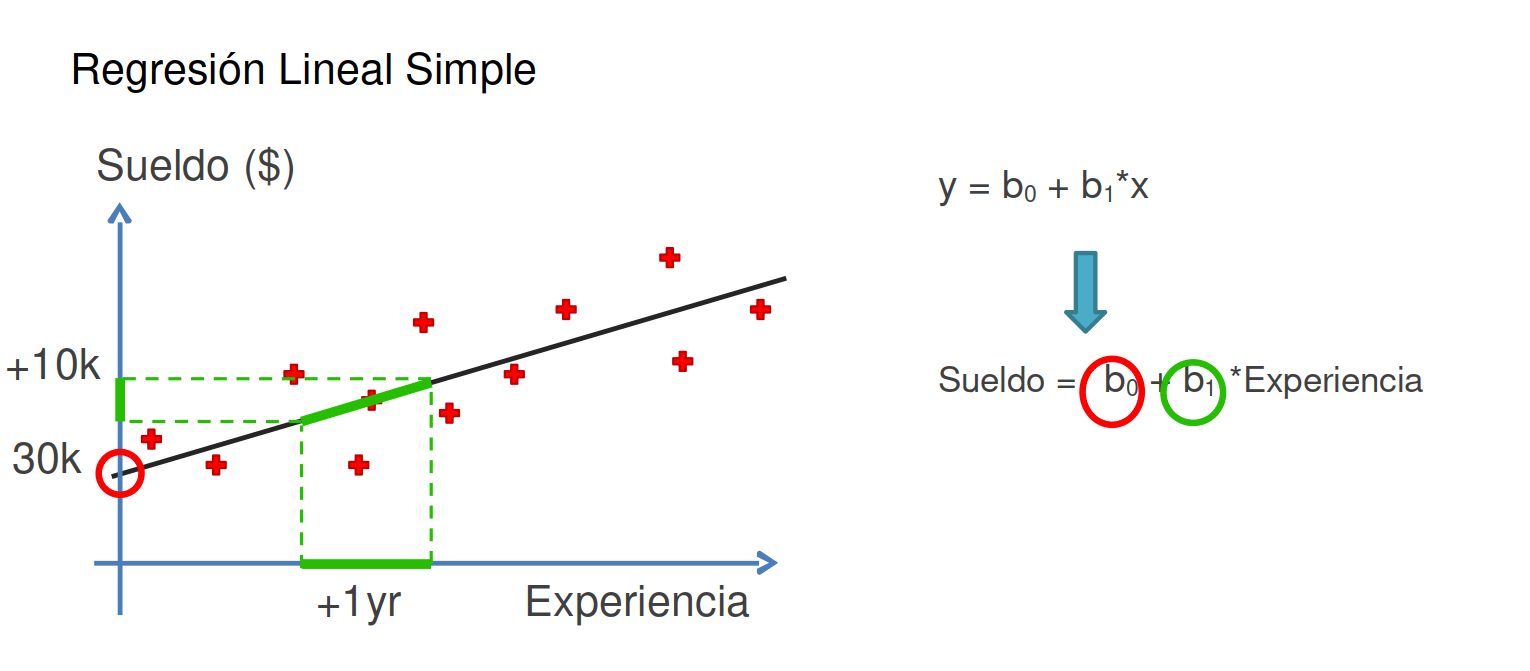


El modelo de regresión lo que hace es encontrar la **Linea de tendencia** que mejor se ajusta a los datos, es decir calcula varias rectas y se queda con la que se ajuste a mas puntos de la representación.
Esto lo hace usando el **método de los minimos cuadrados**.

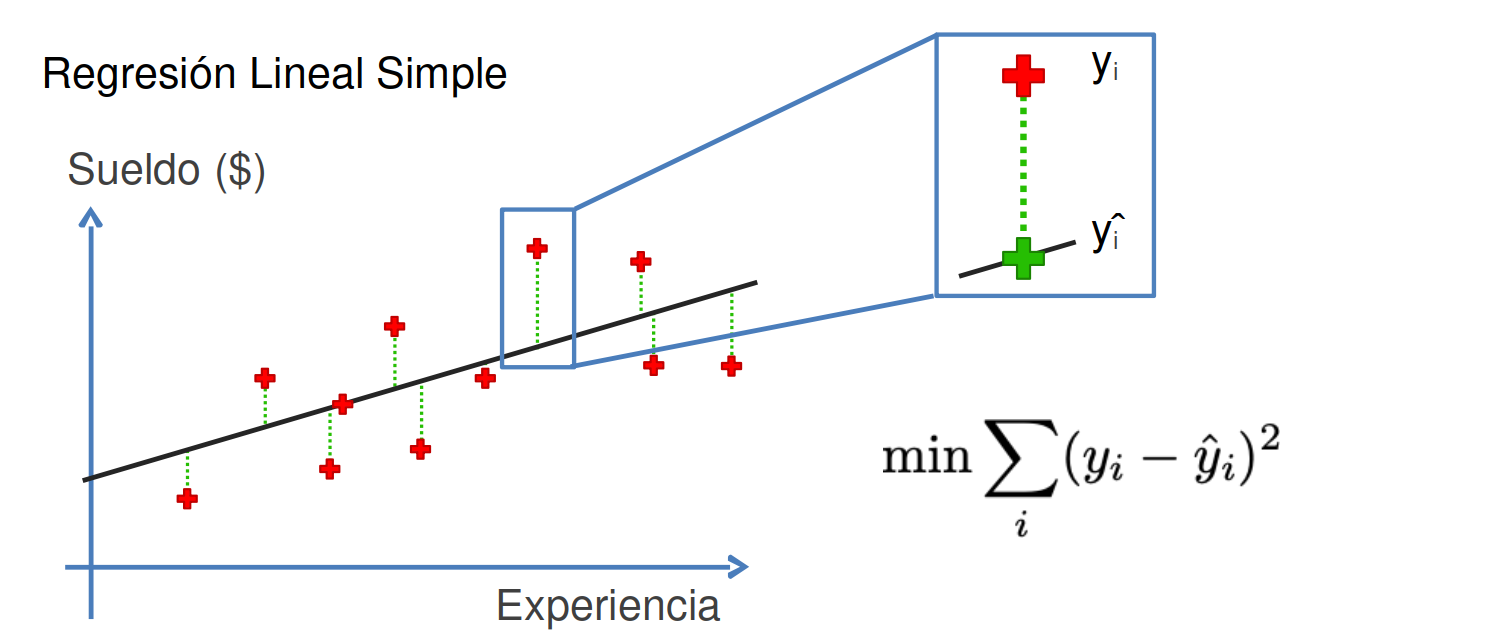

El método de los minimos cuadrados se queda con la recta que minimice la suma de todas las diferencia entre las variables dependientes de nuestros dataset y las variables predecidas al cuadrado.

Nota: La diferencia entre la variable y la predicción se le llama residuo.



# Preparación de las dependencias necesarias




In [ ]:
from google.colab import drive # Montar tu Google drive
from google.colab import drive
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


!git clone https://github.com/alexxsnjr/machine_learning-examples.git
drive.mount('/content/drive')

dataset = pd.read_csv('/content/machine_learning-examples/datasets/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print("------dataset-------")
print(dataset)

#Escalado de variables no necesario ya que solo tenemos 1 variable independiente y no habrá sobredimensionamiento.
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

Cloning into 'machine_learning-examples'...
remote: Enumerating objects: 10195, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10195 (delta 0), reused 6 (delta 0), pack-reused 10188
Receiving objects: 100% (10195/10195), 218.12 MiB | 20.06 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Mounted at /content/drive
------dataset-------
    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.

'\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\n'

# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

# Predecir el conjunto de test

In [ ]:
y_pred = regression.predict(X_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


# Visualizar los resultados de entrenamiento

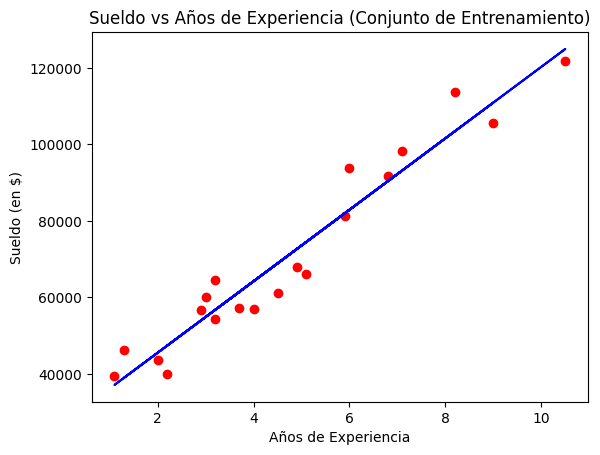

In [ ]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

# Visualizar los resultados de test


Al visualizar los resultados con los datos de test pintamos la linea de regresion predecida con los datos de entrenamiento.

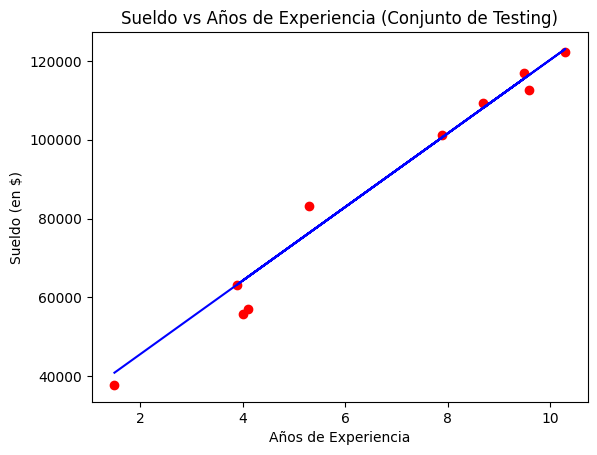

In [ ]:
plt.scatter(X_test, y_test, color = "red")

plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Testing)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()